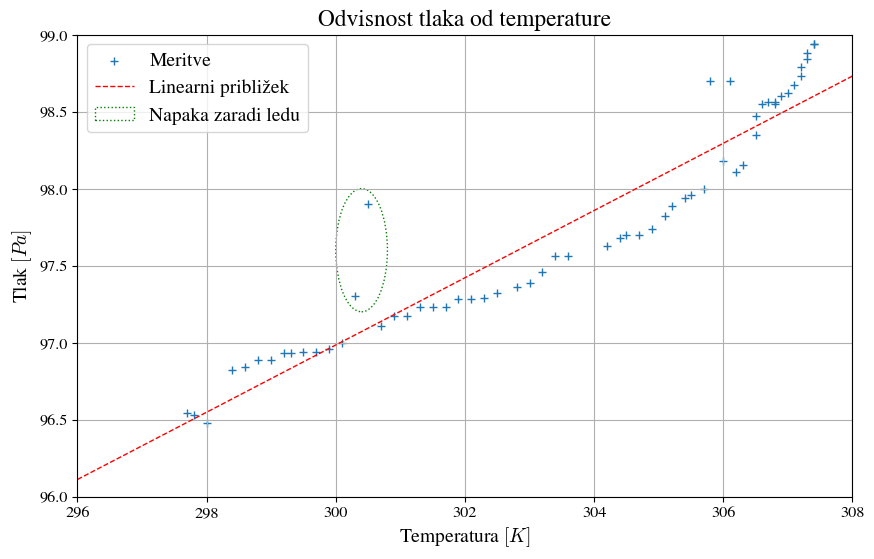

In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import defaultdict
import math as mt 
import matplotlib.ticker as ticker
import plots

ex = pd.read_csv('graf_diabatno_ohlajanje.csv')
keyss = ex.keys()

new_table = defaultdict(lambda : []) #naredi nov seznam

for k in range(0, mt.floor((len(keyss)) /2) - 1): #ta koda je malenkost zapletnea
    #proprosto gre skozi natanko polovico vseh zgornjih stolpcov v eksel tabeli (glej tabelo), ker so osate, zardi napake pri shranjevanju prazne
    for i in range(0, len(ex[keyss[0]]) - 1): #nato gre z zanko skozi celotno tabelo
        new_table[keyss[k + 1]].append(float(str(int(ex[keyss[k * 2 + 1]][i])) + "." + str(int(ex[keyss[k*2 + 2]][i])))) #zaradi napake oz. tega, da sharnjujemo podatke z vejico moramo sedaj vse vrednosti ločene z vejico "parasti" i,e. vsamemo vredno [1] in [2] v sezanmu in nato [3] in [4] (torej 2n in 2n+1 vrednosti)


#to je isto kot pri graf_pv :)

P = [x for x in new_table["tlak"]]
T = [x for x in new_table["temperatura Kelvin"]]

#print(plt.yticks())
#plt.yticks([plt.yticks().index(x) for x in plt.yticks() if x[0].is_integer()])
 
plt.scatter(np.array(T), np.array(P), marker="+", label="Meritve")


start, end = plt.xlim()


x_apr = np.linspace(start, end, 4)
linear_approx = np.poly1d(np.polyfit(np.array(T), np.array(P), 1))

plt.plot(x_apr, linear_approx(x_apr), label="Linearni približek", linestyle="dashed", color="red")

circle1 = plt.Circle((300.4, 97.6), 0.4, color='g', fill=False, linestyle="dotted", label="Napaka zaradi ledu")
plt.gca().add_patch(circle1)

plt.grid()
plt.legend()
plt.title("Odvisnost tlaka od temperature")
plt.xlabel(r"Temperatura $[K]$")
plt.ylabel(r"Tlak $[kPa]$")
plt.savefig("diab.png", dpi=200)
#print(ex.keys())
